In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.models import Sequential
plt.style.use("Solarize_Light2")

In [22]:
# We input our preprocessed data
churn_data = pd.read_csv(
    '/home/elliot/PycharmProjects/CSC 495 - Telecom Customer Churn/Datasets/telecom_churn_Processed.csv')
# we split our data into X - features and Y - churn
X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']

# we create train/test splits for our X & Y data, with 33% of data being in our testing group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

# Standardize our values for internal consistency
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# now we begin to build our model
# initialize constructor
model = Sequential()

#add our first input layer
model.add(Dense(45, kernel_regularizer=tf.keras.regularizers.l2(0.0000001), activation='tanh'))
model.add(Dense(30, kernel_regularizer=tf.keras.regularizers.l2(0.000001), activation='relu'))
model.add(Dense(15, kernel_regularizer=tf.keras.regularizers.l2(0.00001), activation='relu'))
#model.add(Dense(15, kernel_regularizer=tf.keras.regularizers.l2(0.001),input_dim=20, activation='tanh'))
#model.add(Dense(5, kernel_regularizer=tf.keras.regularizers.l2(0.001), input_dim=10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

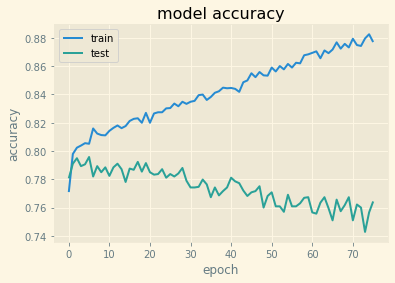

In [23]:
# This chunk of code creates a graphic of accuracy across epochs of the model.

def get_callbacks():
    return [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=70,restore_best_weights=True)]

model.compile(loss = "binary_crossentropy",
                  optimizer = 'adam',
                  metrics=['accuracy'])


history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=150, batch_size=32,   callbacks=get_callbacks(),verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87      1875
         1.0       0.48      0.69      0.57       446

    accuracy                           0.80      2321
   macro avg       0.70      0.76      0.72      2321
weighted avg       0.83      0.80      0.81      2321



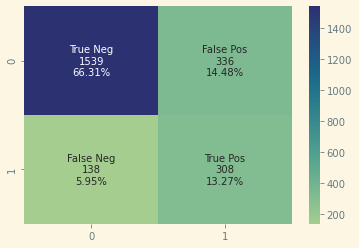

In [24]:
# This chunk of code generates our confusion matrix and classification reports

yprednn = model.predict(X_test_sc)
yprednn = yprednn.round()

cf_matrix = metrics.confusion_matrix(yprednn, y_test)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value}" for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')

print(metrics.classification_report(yprednn, y_test))

